In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.shape

(600, 6)

In [5]:
X = data[['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban']]
Y = np.where(data['Taxable.Income'] <= 30000, 'Risky', 'Good')

In [6]:
X = pd.get_dummies(X, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Decision Tree model

Building Decision Tree Classifier using Entropy Criteria

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

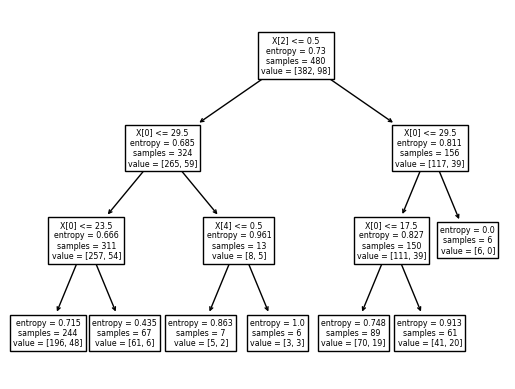

In [11]:
tree.plot_tree(model);


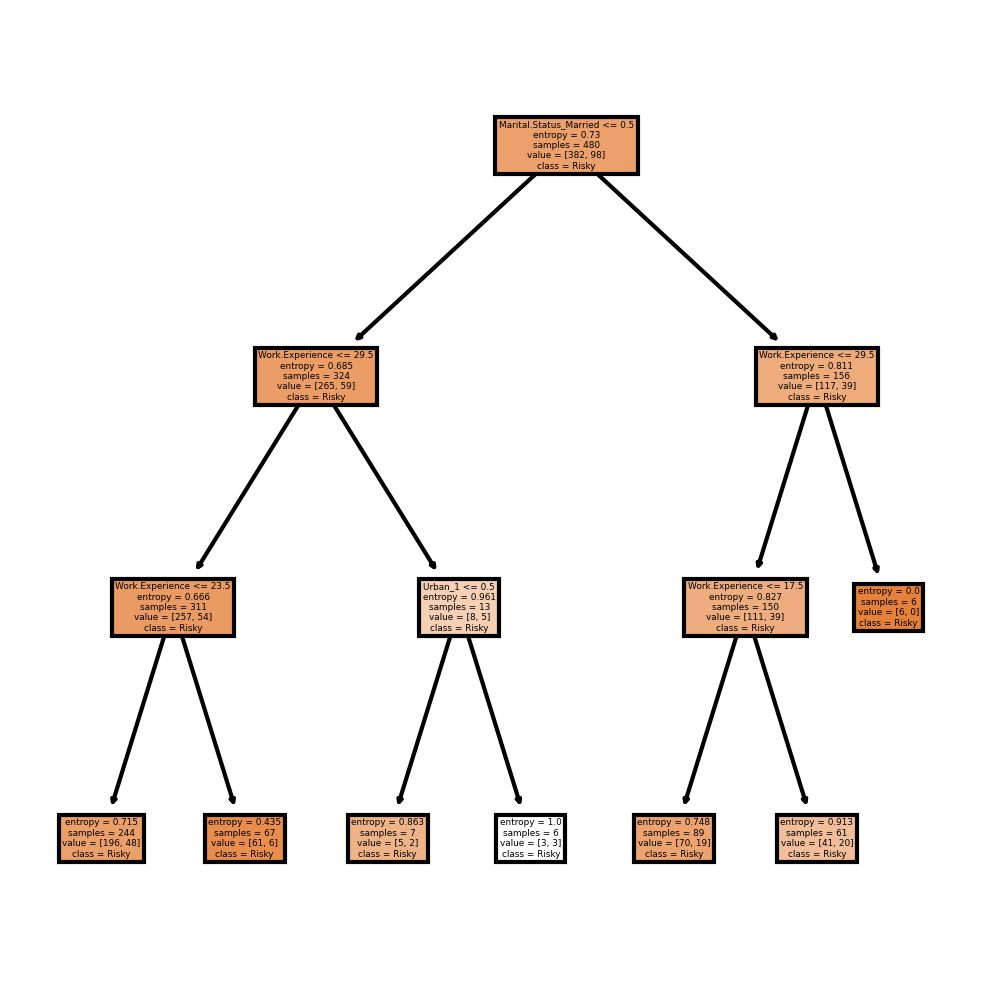

In [12]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = X.columns, class_names=['Risky','Good'],filled = True);

In [13]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_2 <= 0.50
|   |--- feature_0 <= 29.50
|   |   |--- feature_0 <= 23.50
|   |   |   |--- class: Good
|   |   |--- feature_0 >  23.50
|   |   |   |--- class: Good
|   |--- feature_0 >  29.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: Good
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: Good
|--- feature_2 >  0.50
|   |--- feature_0 <= 29.50
|   |   |--- feature_0 <= 17.50
|   |   |   |--- class: Good
|   |   |--- feature_0 >  17.50
|   |   |   |--- class: Good
|   |--- feature_0 >  29.50
|   |   |--- class: Good



In [14]:
model.feature_importances_ 

array([0.79553954, 0.        , 0.16814468, 0.        , 0.03631579])

In [16]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False) 
feature_imp

Work.Experience           0.795540
Marital.Status_Married    0.168145
Urban_1                   0.036316
Undergrad_1               0.000000
Marital.Status_Single     0.000000
dtype: float64

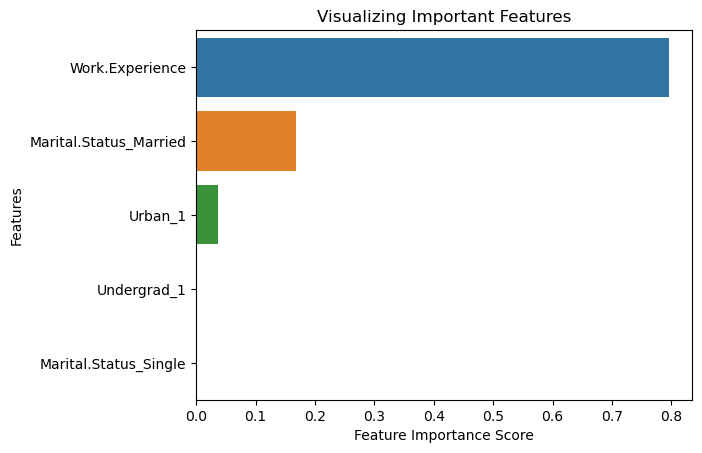

In [17]:
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [19]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Good    120
dtype: int64

In [20]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [21]:
pd.crosstab(y_test,preds)

col_0,Good
row_0,
Good,94
Risky,26


In [22]:
#accuracy
np.mean(preds==y_test)

0.7833333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [23]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7833333333333333

In [25]:
model.feature_importances_ 

array([0.79553954, 0.        , 0.16814468, 0.        , 0.03631579])